# Image Inpainting with Gradient Descent

In [99]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from algorithm import GD

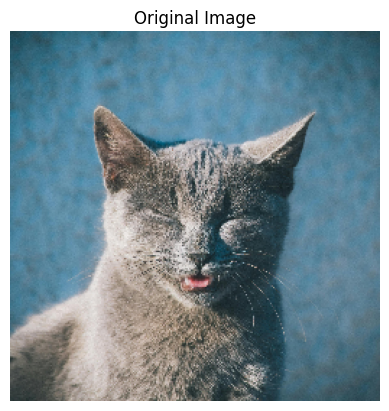

In [102]:
originalImg = cv2.imread('./util/original image.jpg')
originalImg = cv2.cvtColor(originalImg, cv2.COLOR_BGR2RGB)
resizedImg = cv2.resize(originalImg, (256,256)) / 255
plt.title('Original Image')
plt.axis('off')
plt.imshow(resizedImg)

## Creation of mask

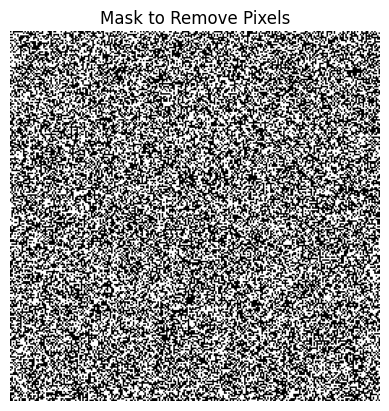

In [107]:
np.random.seed(1)
mask = np.random.choice([0, 1], size=(256, 256), p=[0.5, 0.5])
plt.title('Mask to Remove Pixels')
plt.axis('off')
plt.imshow(mask, cmap='gray')

## Applying the mask

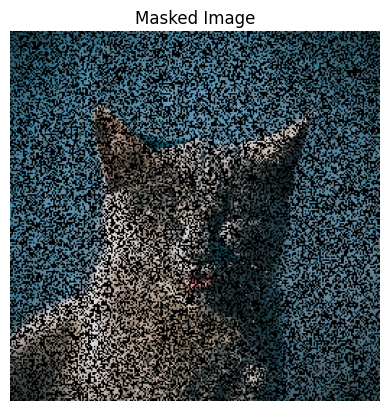

In [103]:
maskedImage = np.zeros_like(resizedImg)
channels = resizedImg.shape[2]
for channel in range(channels):
    desiredChannel = resizedImg[:, :, channel]
    maskedChannel = mask * desiredChannel
    maskedImage[:, :, channel] = maskedChannel
plt.title('Masked Image')
plt.axis('off')
plt.imshow(maskedImage)    

## Applying Gradient Descent

Final Gradient Magnitude: 3.4506e-11


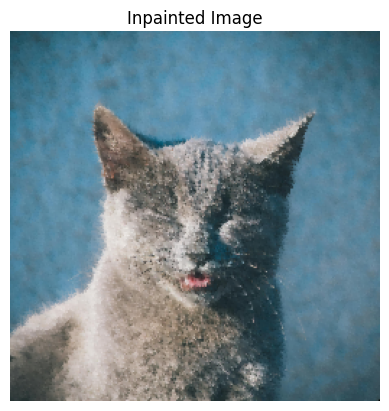

In [104]:
inpaintedImage = GD(maskedImage, mask, lmbda=0.1)
plt.axis('off')
plt.title('Inpainted Image')
plt.imshow(inpaintedImage)

## Results

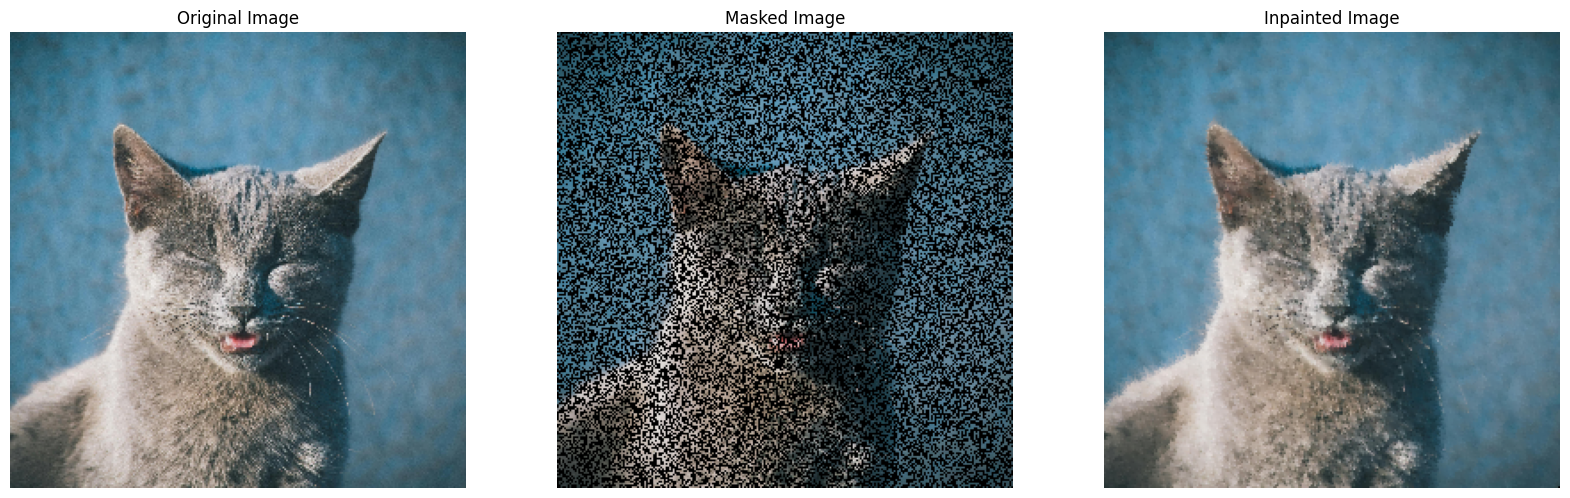

In [105]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(resizedImg)
plt.subplot(1,3,2)
plt.axis('off')
plt.title('Masked Image')
plt.imshow(maskedImage)
plt.subplot(1,3,3)
plt.title('Inpainted Image')
plt.imshow(inpaintedImage)
plt.axis('off')
plt.show()